In [1]:
import sys 

import sklearn
import numpy as np 
import os

In [2]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

from sklearn.model_selection import train_test_split

In [3]:
mnist = fetch_openml('Fashion-MNIST', version=1)

X = mnist["data"]
y = mnist["target"]
y = y.astype(np.uint8)

x_train_full, x_test, y_train_full, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
x_train, x_validate, y_train, y_validate = train_test_split(x_train_full, y_train_full)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train)

In [9]:
print("number of cmponents is " + str(pca.n_components_))

np.sum(pca.explained_variance_ratio_[:10])
np.sum(pca.explained_variance_ratio_[:50])


x_recovered = pca.inverse_transform(x_reduced)

number of cmponents is 187


In [6]:
def plot_pictures(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")



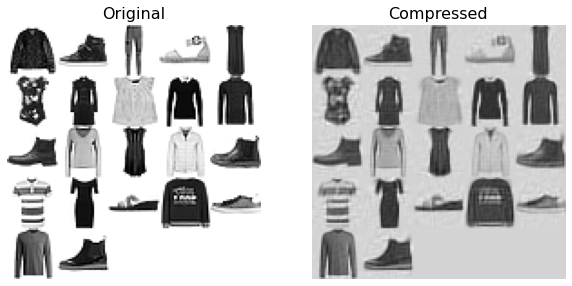

In [12]:
with io.capture_output() as captured:
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plot_pictures(x_train[::2100])
    plt.title("Original", fontsize=16)
    plt.subplot(122)
    plot_pictures(x_recovered[::2100])
    plt.title("Compressed", fontsize=16)